In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trigger import *
import h5py

In [68]:
n_sample = 1000
amplitude = np.linspace(10, 100, 10)
moving_average = np.linspace(3, 21, 7)

find the best value of window_size varying the window_size and computing the efficiency for each window_size.

Process repeated for multiple amplitudes

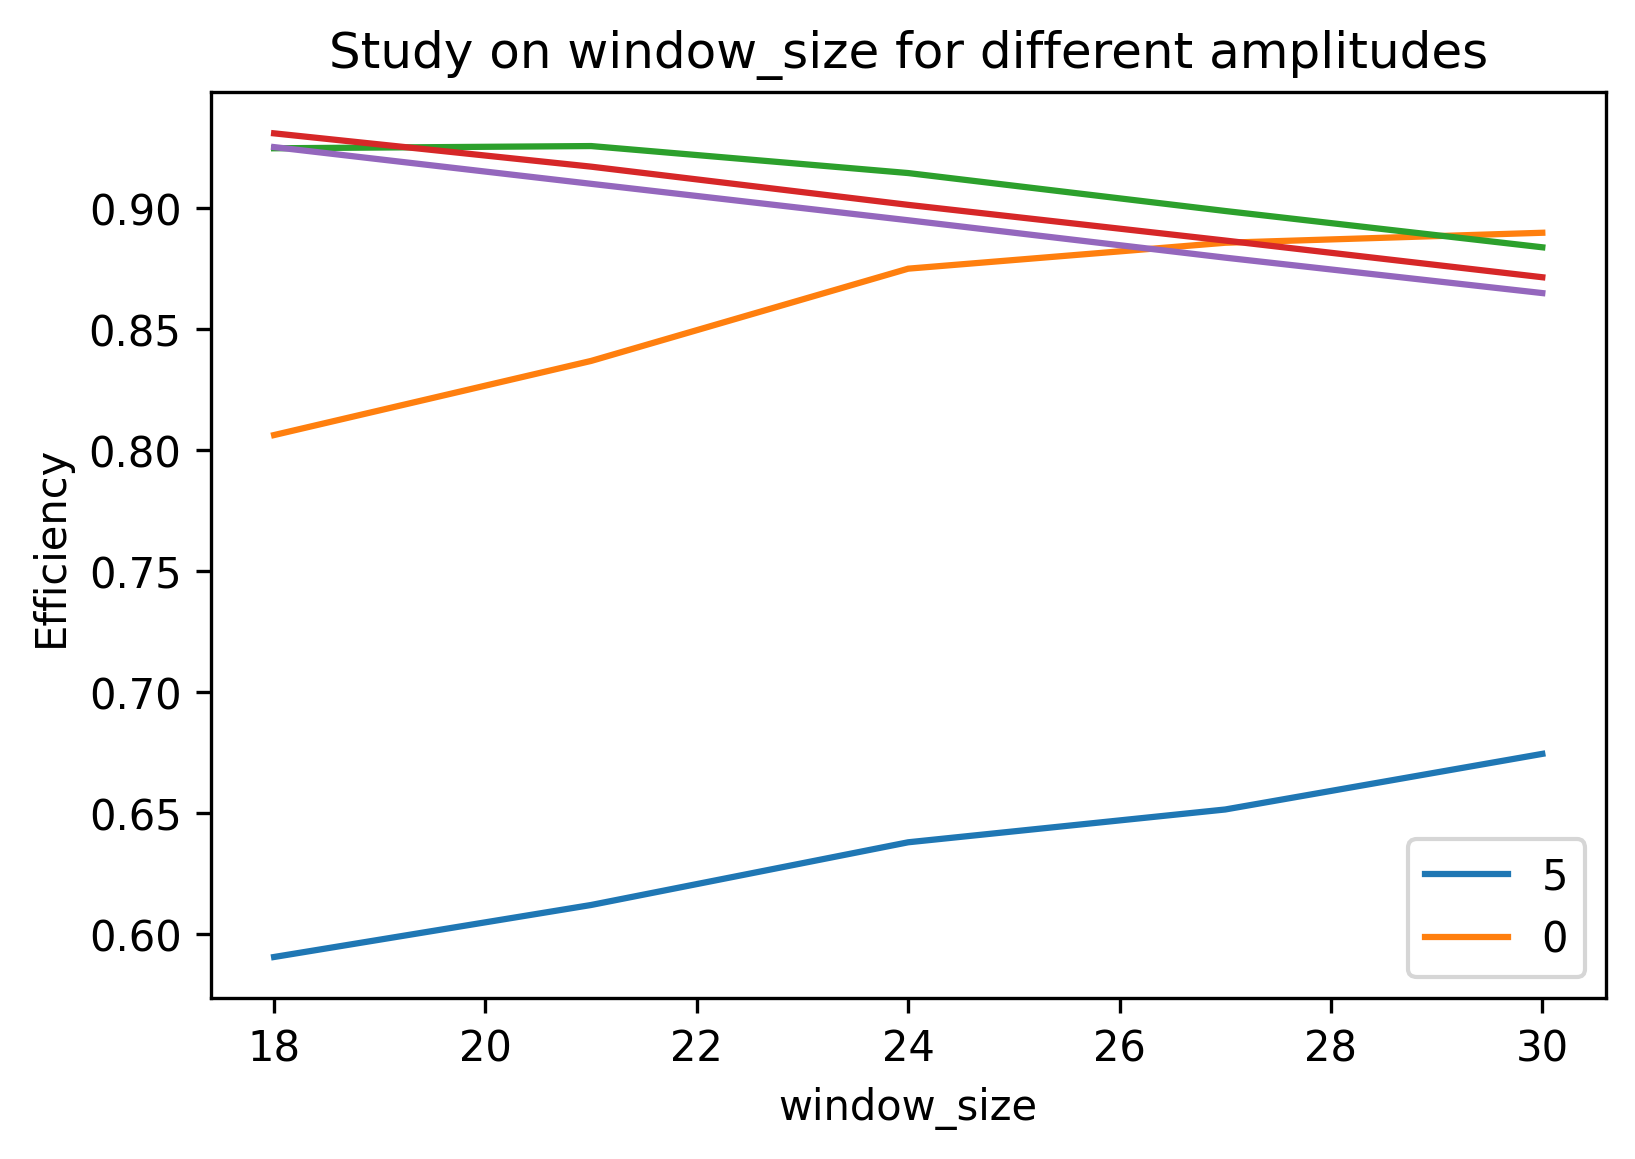

In [28]:
fig = plt.figure(dpi = 300)

for amp in amplitude:
    total_eff = []
    for avg in moving_average:
        single_eff = []
        for i in range(n_sample):
            signal = gen_signal(baseline=-10, amplitude=amp, noise_lev=1)
            min = derivative_trigger(signal, int(avg))
            single_eff.append(efficiency(min))

        total_eff.append(get_efficiency(single_eff, n_sample))

    plt.plot(moving_average, total_eff)
    plt.legend(str(int(amp)))

fig.patch.set_facecolor('white')       
plt.title('Study on window_size for different amplitudes')
plt.xlabel('window_size')
plt.ylabel('Efficiency')
plt.show()

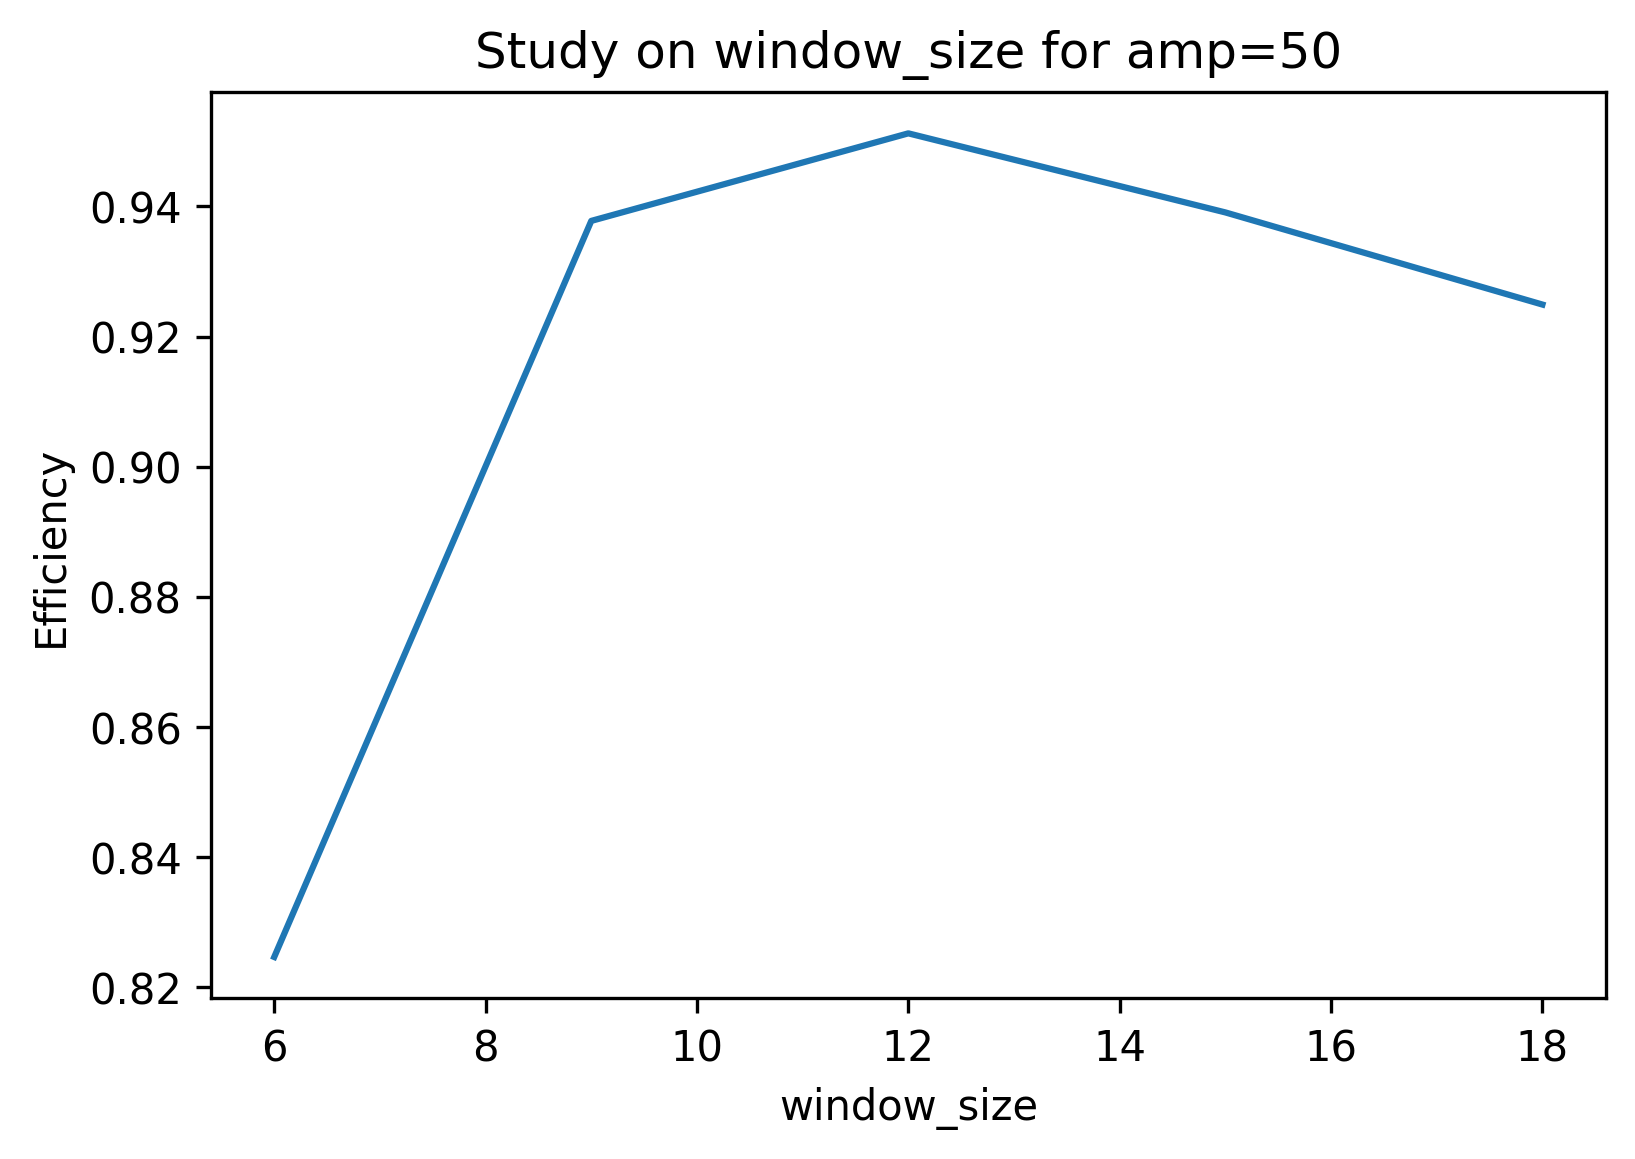

In [23]:
fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')       
plt.plot(moving_average, total_eff)
plt.title('Study on window_size for amp=50')
plt.xlabel('window_size')
plt.ylabel('Efficiency')
plt.show()

using the best value for window_size, plot the efficiency as a function of the amplitude. Data generated before and saved on hdf5 are used in this case

In [66]:
total_eff = []
for amp in amplitude:
    single_eff = []
    with h5py.File('data_sim/signal_amp_' + str(int(amp)) + '.h5', 'r') as hdf:
        sig, mv_avg = [], []
        sig = np.array(hdf['signal'])
        mv_avg = np.array(hdf['moving_average'])
    for i in range(len(sig)):
        min = derivative_trigger_avg(sig[i], mv_avg[i])
        single_eff.append(efficiency(min))

    total_eff.append(get_efficiency(single_eff, n_sample))

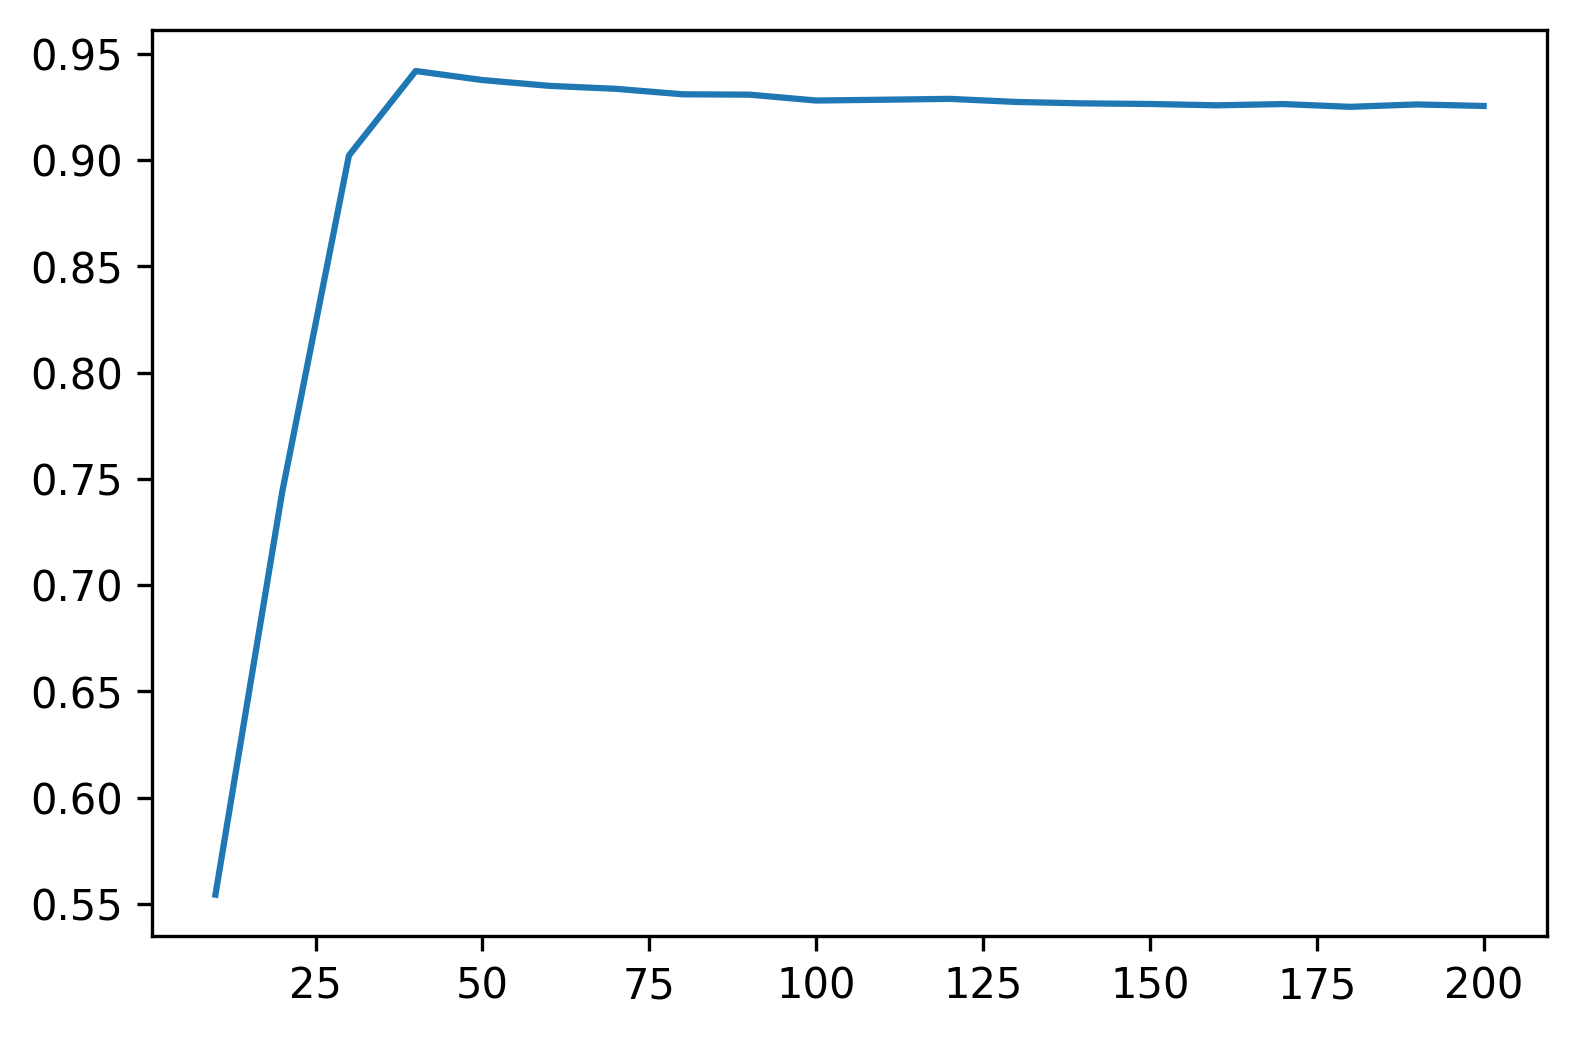

In [67]:
fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')       

plt.plot(amplitude, total_eff)
plt.show()

plot the efficiency as a function of the amplitudefor differnt values of window_size. Data generated during the cycle

ok for 3 window_size
ok for 6 window_size
ok for 9 window_size
ok for 12 window_size
ok for 15 window_size
ok for 18 window_size
ok for 21 window_size


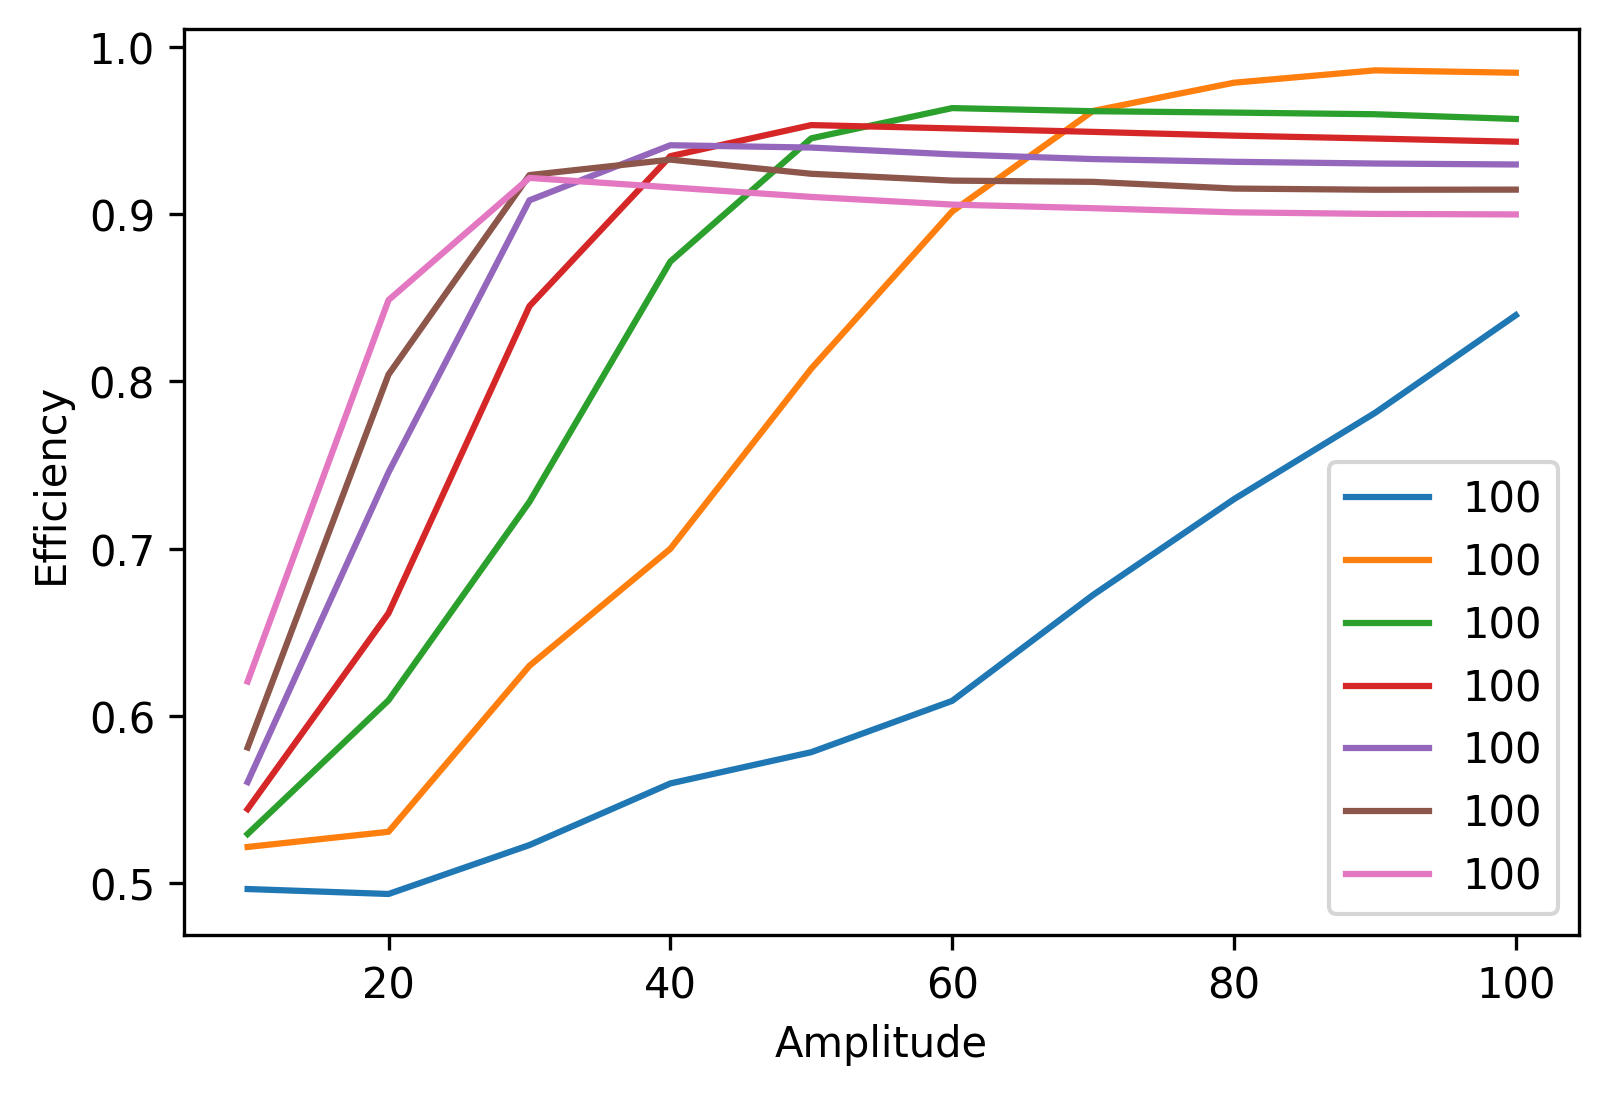

In [69]:
fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')  

for avg in moving_average:
    total_eff = []
    for amp in amplitude:
        single_eff = []
        for i in range(n_sample):
            signal = gen_signal(baseline=-10, amplitude=amp, noise_lev=1)
            min = derivative_trigger(signal, int(avg))
            single_eff.append(efficiency(min))

        total_eff.append(get_efficiency(single_eff, n_sample))
    plt.plot(amplitude, total_eff, label=int(avg))
    print('ok for %d window_size' %avg)
    
plt.xlabel('Amplitude')
plt.ylabel('Efficiency')
plt.legend()
plt.show()
